In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter, FuncFormatter
from pyfermions import *

# wavelets1d.pdf

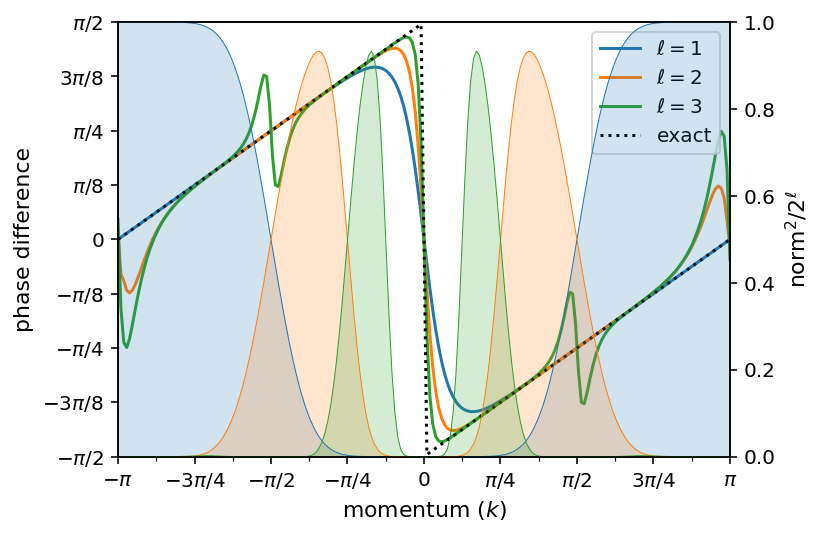

In [2]:
m = mera1d.selesnick(K=4, L=6)

fig, ax1 = plt.subplots(figsize=(5.9, 3.9))
ax2 = ax1.twinx()

k = np.linspace(-np.pi, np.pi, 211)
for l in [1, 2, 3]:
    a, b = m.eigenmode_pair(l)
    A = a.ft(k)
    B = b.ft(k)
    ax1.plot(k, np.angle(B / A), label=r'$\ell = %d$' % l)

    magnitude = np.abs(A)**2 / 2**l
    ax2.plot(k, magnitude, lw=.5)
    ax2.fill_between(k, 0, magnitude, alpha=.2)

ax1.plot(
    k, np.angle(-1j * np.sign(k) * np.exp(1j * k / 2)), ':k', label='exact')

ax1.set_xlabel('momentum ($k$)', fontsize=11)
ax1.xaxis.set_major_locator(FixedLocator(np.linspace(-np.pi, np.pi, 8 + 1)))
ax1.xaxis.set_minor_locator(FixedLocator(np.linspace(-np.pi, np.pi, 16 + 1)))
ax1.xaxis.set_major_formatter(
    FixedFormatter([
        '$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', 0, '$\pi/4$', '$\pi/2$',
        '$3\pi/4$', '$\pi$'
    ]))
ax1.set_xlim(-np.pi, np.pi)

ax1.set_ylabel('phase difference', fontsize=11)
ax1.yaxis.set_major_locator(
    FixedLocator(np.linspace(-np.pi / 2, np.pi / 2, 8 + 1)))
ax1.yaxis.set_major_formatter(
    FixedFormatter([
        '$-\pi/2$', '$-3\pi/8$', '$-\pi/4$', '$-\pi/8$', 0, '$\pi/8$',
        '$\pi/4$', '$3\pi/8$', '$\pi/2$'
    ]))
ax1.set_ylim(-np.pi / 2, np.pi / 2)

ax2.set_ylabel(r'norm$^2 / 2^\ell$', fontsize=11)
# ax2.yaxis.set_major_locator(MultipleLocator(.1))
ax2.set_ylim(0, 1)

ax1.legend()
fig.tight_layout()
fig.savefig('wavelets1d.pdf')

# renorm1d.pdf

### Right panel

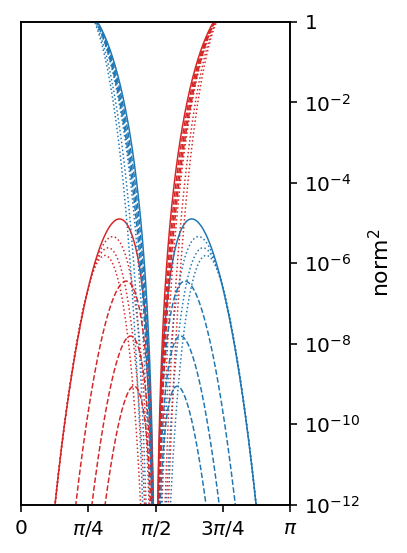

In [3]:
def right_panel(ax):
    ax.yaxis.set_visible(False)
    ax = ax.twinx()

    blue, _, _, red, *rest = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    def plot(K, L, *args, **kwargs):
        m = mera1d.selesnick(K=K, L=L)
        s_neg = m.eigenmode(1)
        s_pos = m.eigenmode(1, positive_energy=True)

        k = np.linspace(-np.pi, np.pi, 1024)
        S_neg = s_neg.ft(k)
        S_pos = s_pos.ft(k)

        pos, = ax.semilogy(
            k, np.abs(S_neg)**2, *args, lw=.75, color=blue, **kwargs)
        neg, = ax.semilogy(
            k, np.abs(S_pos)**2, *args, lw=.75, color=red, **kwargs)
        return pos, neg

    pos, neg = plot(K=4, L=4)
    for K in [6, 8, 10]:
        plot(K, 4, ':')
    for L in [6, 8, 10]:
        plot(4, L, '--')

    ax.set_xlabel('momentum ($k$)', fontsize=11)
    ax.xaxis.set_major_locator(FixedLocator(np.linspace(0, np.pi, 4 + 1)))
    ax.xaxis.set_major_formatter(
        FixedFormatter(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']))
    ax.set_xlim(0, np.pi)

    ax.set_ylim(10**-12, 1)
    ax.set_ylabel('norm$^2$', fontsize=11)
    ax.yaxis.set_major_formatter(
        FuncFormatter(
            lambda x, _: '$1$' if x == 1 else '$10^{%d}$' % int(np.log10(x))))


fig, ax = plt.subplots(figsize=(3, 4))
right_panel(ax)
fig.tight_layout()

### Left panel

/Users/michael/.local/share/virtualenvs/pyfermions/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


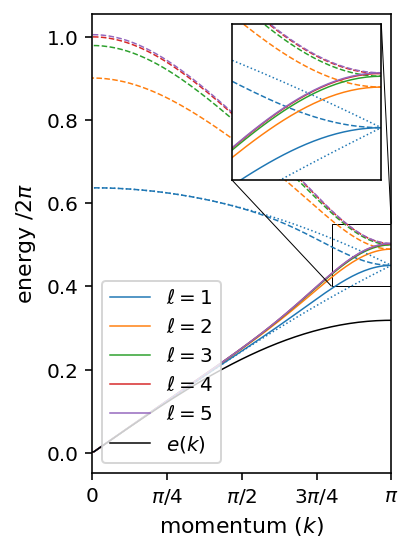

In [4]:
def left_panel(ax):
    m = mera1d.selesnick(K=4, L=6)
    k = np.linspace(-np.pi, np.pi, 200)
    two_pi = 2 * np.pi

    def curves(ax):
        level_1_color = None
        for l in range(1, 5 + 1):
            # plot 2^l times the scaling dispersion relation
            p, = ax.plot(
                k,
                2**l * m.e_scaling(l, k) / two_pi,
                lw=.75,
                label='$\ell = %d$' % l)
            if l == 1:
                level_1_color = p.get_color()

            # plot 2^l times the wavelet dispersion relation
            ax.plot(
                k,
                2**l * m.e_wavelet(l, k) / two_pi,
                '--',
                lw=.75,
                color=p.get_color())

        # plot dispersion relations that we would get if the renormalization was perfect
        ax.plot(
            k,
            2 * m.e_scaling(0, k / 2) / two_pi,
            ':',
            color=level_1_color,
            lw=.75)
        ax.plot(
            k,
            2 * m.e_scaling(0, k / 2 + np.pi) / two_pi,
            ':k',
            color=level_1_color,
            lw=.75)

        # plot original dispersion relation e(k)
        ax.plot(k, m.e_scaling(0, k) / two_pi, 'k', lw=.75, label='$e(k)$')

    curves(ax)
    ax.set_xlabel('momentum ($k$)', fontsize=11)
    ax.xaxis.set_major_locator(FixedLocator(np.linspace(0, np.pi, 4 + 1)))
    ax.xaxis.set_major_formatter(
        FixedFormatter(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']))
    ax.set_xlim(0, np.pi)
    ax.set_ylabel('energy $/2\pi$', fontsize=11)
    ax.legend(loc='lower left')

    # create inset
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
    inset = zoomed_inset_axes(ax, 2.5)
    curves(inset)
    inset.set_xlim(4 / 5 * np.pi, np.pi)
    inset.set_ylim(.4, .55)
    inset.xaxis.set_visible(False)
    inset.yaxis.set_visible(False)
    mark_inset(ax, inset, loc1=1, loc2=3, lw=.5)


fig, ax = plt.subplots(figsize=(3, 4))
left_panel(ax)
fig.tight_layout()

/Users/michael/.local/share/virtualenvs/pyfermions/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


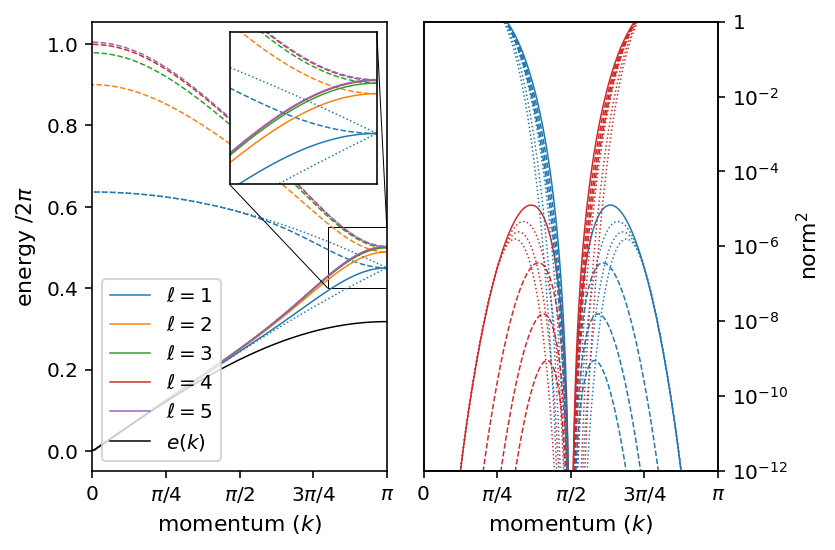

In [5]:
fig, (l, r) = plt.subplots(ncols=2, figsize=(6, 4))
right_panel(r)
left_panel(l)
r.xaxis.set_label_text('momentum ($k$)', fontsize=11)
fig.tight_layout()
fig.savefig('renorm1d.pdf')